<a href="https://colab.research.google.com/github/D3moSSS/AI/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from datetime import date
import numpy
import pandas as panda
import pandas as pd
from pandas import Series

import csv
import matplotlib.pyplot as plt
from math import log, sqrt

<ipython-input-49-b5a70a9118e3>:2: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename)


Numarul de respondenti: 25974
Numărul total de atribute per respondent: 369
Tipurile de date pentru fiecare atribut:
 Time from Start to Finish (seconds)    object
Q1                                     object
Q2                                     object
Q3                                     object
Q4                                     object
                                        ...  
Q38_B_Part_8                           object
Q38_B_Part_9                           object
Q38_B_Part_10                          object
Q38_B_Part_11                          object
Q38_B_OTHER                            object
Length: 369, dtype: object
Numărul de respondenți cu date complete: 0
Durata medie a studiilor pentru toți respondenții: 3.96 ani
Durata medie a studiilor pentru respondenții din România: 4.16 ani
Durata medie a studiilor pentru femeile din România: 4.75 ani
Numarul de femei din Romania care programeaza in Python : 3877
Intervalul de varsta cu cele mai multe femei care prog

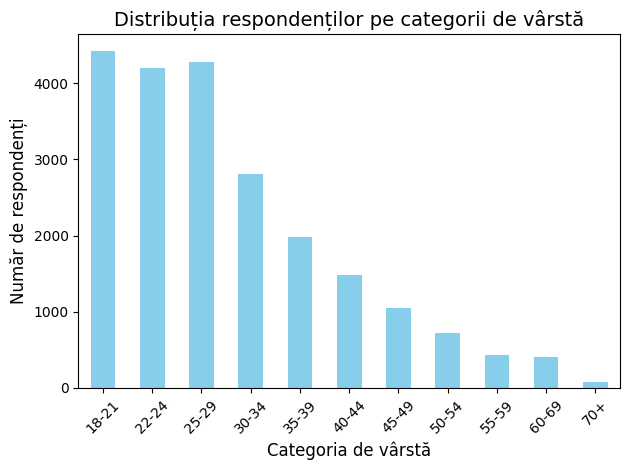

Q1
18-21     3
22-24    11
25-29     7
30-34     6
35-39     8
40-44     8
45-49     4
50-54     4
Name: count, dtype: int64


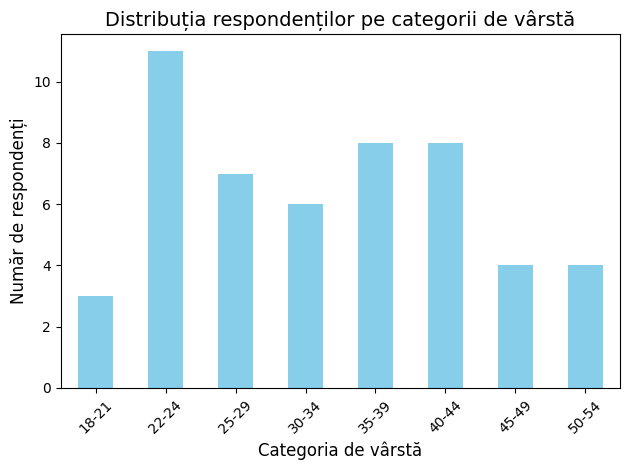

Q1
18-21    1
22-24    3
25-29    2
35-39    5
40-44    1
Name: count, dtype: int64


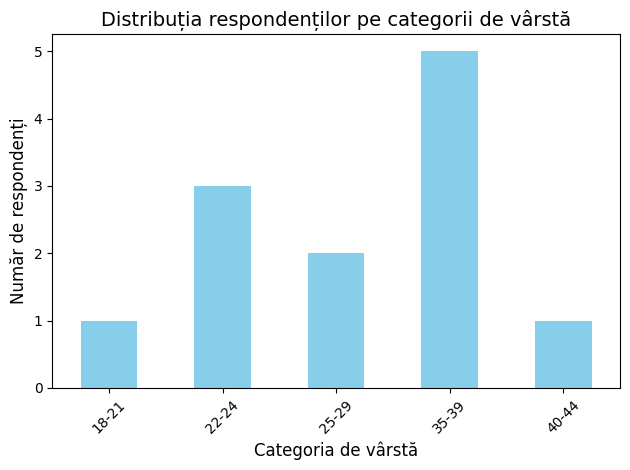

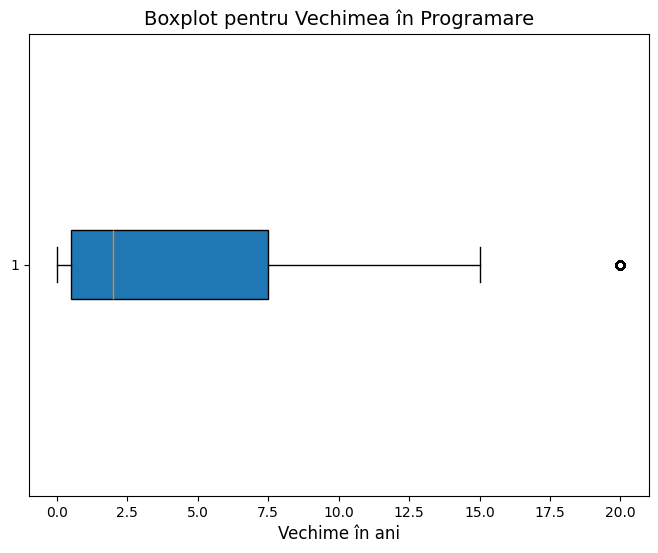

In [49]:
filename = "../surveyDataSience.csv"
data = pd.read_csv(filename)

# return: numarul de respondenti
def getNr():
    return len(data)

# Eliminăm primul rând care conține întrebările
data_cleaned = data.iloc[1:].reset_index(drop=True)

# 1. Numărul și tipul informațiilor (atributelor) deținute pentru un respondent
num_atribute = data_cleaned.shape[1]  # Numărul total de coloane
tip_atribute = data_cleaned.dtypes  # Tipul fiecărei coloane

# 2. Numărul de respondenți pentru care se dețin date complete (fără valori lipsă)
num_respondenti_complete = data_cleaned.dropna().shape[0]

print("Numarul de respondenti:" , getNr())
# Afișăm rezultatele
print(f"Numărul total de atribute per respondent: {num_atribute}")
print("Tipurile de date pentru fiecare atribut:\n", tip_atribute)
print(f"Numărul de respondenți cu date complete: {num_respondenti_complete}")

# Dicționar pentru conversia nivelului de studii în ani
mapare_studii = {
    "Bachelor’s degree": 3,
    "Master’s degree": 5,  # 3 ani licență + 2 ani master
    "Doctoral degree": 8  # 3 ani licență + 2 ani master + 3 ani doctorat
}

# Convertim nivelurile de educație în ani de studii
data_cleaned['Ani_Studii'] = data_cleaned['Q4'].map(mapare_studii).fillna(0).astype(int)

# Durata medie a studiilor pentru toți respondenții
media_generala = data_cleaned['Ani_Studii'].mean()

# Durata medie pentru respondenții din România
media_romania = data_cleaned[data_cleaned['Q3'] == 'Romania']['Ani_Studii'].mean()

# Durata medie pentru femeile din România
media_romania_femei = data_cleaned[(data_cleaned['Q3'] == 'Romania') & (data_cleaned['Q2'] == 'Woman')]['Ani_Studii'].mean()

# Afișăm rezultatele
print(f"Durata medie a studiilor pentru toți respondenții: {media_generala:.2f} ani")
print(f"Durata medie a studiilor pentru respondenții din România: {media_romania:.2f} ani")
print(f"Durata medie a studiilor pentru femeile din România: {media_romania_femei:.2f} ani")

filter_data_Python = data_cleaned[(data_cleaned['Q7_Part_1'] == "Python") & (data_cleaned['Q2'] == "Woman")]
print(f"Numarul de femei din Romania care programeaza in Python : {len(filter_data_Python)}")

frecvente = filter_data_Python['Q1'].value_counts()

cel_mai_frecvent_interval = frecvente.idxmax()
print(f"Intervalul de varsta cu cele mai multe femei care programeaza in Python : {cel_mai_frecvent_interval} ")

filter_data_C = data_cleaned[(data_cleaned['Q7_Part_5'] == "C++") & (data_cleaned['Q2'] == "Woman")]

print(f"Numarul de femei din Romania care programeaza in C++ : {len(filter_data_C)}")

frecvente = filter_data_C['Q1'].value_counts()

cel_mai_frecvent_interval = frecvente.idxmax()
print(f"Intervalul de varsta cu cele mai multe femei care programeaza in C++ : {cel_mai_frecvent_interval} ")

interval_map = {
    '20+ years': 20,  # presupunem că 20+ reprezintă 20 de ani
    'I have never written code': 0,  # tratăm această valoare ca NaN
    '< 1 years': 0.5,  # 0.5 ani pentru "< 1 years"
    '1-3 years': 2,  # mijlocul intervalului 1-3 ani
    '5-10 years': 7.5,  # mijlocul intervalului 5-10 ani
    '10-20 years': 15,  # mijlocul intervalului 10-20 ani
    '3-5 years': 4  # mijlocul intervalului 3-5 ani
}

data_cleaned['vechime_ani'] = data_cleaned['Q6'].map(interval_map)

statistici = data_cleaned['vechime_ani'].describe()
print(statistici)

filter = data_cleaned[(data_cleaned['Q7_Part_1'] == 'Python')]

distributie_varsta = filter['Q1'].value_counts().sort_index()
print(distributie_varsta)

distributie_varsta.plot(kind='bar', color='skyblue')

# Setăm titlul și etichetele axelor
plt.title('Distribuția respondenților pe categorii de vârstă', fontsize=14)
plt.xlabel('Categoria de vârstă', fontsize=12)
plt.ylabel('Număr de respondenți', fontsize=12)

# Afișăm graficul
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

filter = data_cleaned[(data_cleaned['Q7_Part_1'] == 'Python') & (data_cleaned['Q3'] == "Romania")]

distributie_varsta = filter['Q1'].value_counts().sort_index()
print(distributie_varsta)

distributie_varsta.plot(kind='bar', color='skyblue')

# Setăm titlul și etichetele axelor
plt.title('Distribuția respondenților pe categorii de vârstă', fontsize=14)
plt.xlabel('Categoria de vârstă', fontsize=12)
plt.ylabel('Număr de respondenți', fontsize=12)

# Afișăm graficul
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

filter = data_cleaned[(data_cleaned['Q7_Part_1'] == 'Python') & (data_cleaned['Q3'] == "Romania") & (data_cleaned['Q2'] == 'Woman')]

distributie_varsta = filter['Q1'].value_counts().sort_index()
print(distributie_varsta)

distributie_varsta.plot(kind='bar', color='skyblue')

# Setăm titlul și etichetele axelor
plt.title('Distribuția respondenților pe categorii de vârstă', fontsize=14)
plt.xlabel('Categoria de vârstă', fontsize=12)
plt.ylabel('Număr de respondenți', fontsize=12)

# Afișăm graficul
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print()

# Calculăm boxplot-ul pentru a vizualiza outlierii
plt.figure(figsize=(8, 6))
plt.boxplot(data_cleaned['vechime_ani'].dropna(), vert=False, patch_artist=True)

# Setăm titluri și etichete
plt.title('Boxplot pentru Vechimea în Programare', fontsize=14)
plt.xlabel('Vechime în ani', fontsize=12)

# Afișăm graficul
plt.show()
